## 1) Robustez vs. ataques: aeropuertos (libre de escala) vs. alcantarillado (reticular / mundo pequeño)

**Distribución de grados (idea clave)**  
- **Libre de escala (aeropuertos):** $$P(k)\sim k^{-\gamma}$$ con $$2<\gamma<3$$ ⇒ existen **hubs** muy conectados y muchos nodos de bajo grado.  
- **Reticular / mundo pequeño (alcantarillado):** grados **acotados y homogéneos**, **alto clustering** local y algunos **atajos**.

**Fallas aleatorias**  
- **Más vulnerable:** alcantarillado, al carecer de hubs que amortigüen eliminaciones al azar.  
- **Más robusta:** aeropuertos, porque las fallas típicamente afectan nodos de bajo grado y los hubs sostienen la **componente gigante**.

**Ataques dirigidos**  
- **Más vulnerable:** aeropuertos; la caída coordinada de los 5 hubs mayores rompe puentes globales, aumenta el diámetro y fragmenta la red.  
- **Más robusta:** alcantarillado; sin hubs claros, atacar 5 estaciones resulta menos devastador y suelen existir rutas locales alternativas.



## 2) Cuándo no aplica Barabási–Albert (BA) y por qué

**Suposiciones de BA**  
(1) **Crecimiento** sostenido del grafo. (2) **Adjunción preferencial** (nuevos nodos se conectan ∝ al grado).

**Ejemplo que viola BA: red vial urbana (calles–intersecciones)**  
- La geometría y la regulación **planar** limitan el grado; no es factible añadir muchas aristas a un mismo nodo.  
- La adjunción preferencial **no es pura**; el grado queda **acotado** por capacidad/espacio.  
- En consecuencia, $$P(k)$$ **no** sigue una ley de potencia clara y **no** emergen hubs extremos.

**Inadecuación del modelo BA**  
- **Sobreestima** la aparición de hubs y de colas pesadas en $$P(k)$$.  
- Omite **costos, espacialidad y límites de capacidad**.  
- Induce predicciones de longitudes de camino y resiliencia que **no** corresponden a redes geométricas.


## 3) Watts–Strogatz: variación de clustering y longitud de camino con $$p$$

**Puntos de referencia**  
- Anillo regular con grado medio $$\langle k\rangle=k$$.  
- En $$p=0$$ (orden): $$C(0)\approx\frac{3\,(k-2)}{4\,(k-1)}$$ y $$L(0)\sim\frac{n}{2k}$$.  
- En $$p=1$$ (aleatoria Erdős–Rényi): $$C_{\text{rand}}\approx\frac{\langle k\rangle}{n}$$ y $$L_{\text{rand}}\sim\frac{\ln n}{\ln\langle k\rangle}$$.

**Tendencias al aumentar $$p\in[0,1]$$**  
- **Clustering**: $$C(p)$$ **decrece gradualmente** desde $$C(0)$$ hacia ≈ $$\langle k\rangle/n$$. Aproximación ilustrativa: $$C(p)\approx C(0)\,(1-p)^3$$.  
- **Longitud de camino**: $$L(p)$$ **cae con rapidez** incluso con $$p\ll 1$$; unos pocos atajos bastan para aproximar $$L_{\text{rand}}$$.

**Efecto de un $$p=0.01$$**  
- Con solo 1% de recableo aparecen **atajos** entre nodos lejanos, de modo que  
  $L(p\!\ll\!1)\approx L_{\text{rand}}\quad\text{mientras}\quad C(p\!\ll\!1)\approx C(0).$  
- Se obtiene el **régimen de mundo pequeño**: **caminos cortos** sin perder **clustering** local elevado.


## 4) Red social con comunidades fuertes **y** hubs: regla generativa

**Objetivo**  
- Mantener **comunidades densas** (universidad, trabajo) con clustering alto.  
- Permitir **hubs/influencers** para inducir cola pesada en $$P(k)$$.

**Regla conceptual (sin código)**  
1) **Base comunitaria**: crear $$B$$ comunidades de tamaños $$n_1,\dots,n_B$$; dentro de cada una, conectar con **WS de $$p$$ bajo** o **SBM** con $$p_{\text{in}}$$ alto (clustering).  
2) **Fitness / popularidad**: asignar a cada nodo una **fitness** $$\eta_i$$ (p. ej., log-normal o potencia truncada) como atractivo global.  
3) **Adjunción mixta** por enlace:  
   - Con prob. $$\alpha$$ (**cierre triádico**), conectar con amigos de amigos (refuerzo comunitario y clustering).  
   - Con prob. $$1-\alpha$$ (**preferencia global**), elegir destino con prob. $$\propto\,\eta_j\,(k_j+1)^{\beta}$$ (emergencia de hubs).  
4) **Puentes intercomunidad**: con prob. pequeña $$\varepsilon$$, dirigir el enlace a otra comunidad (atajos y caminos cortos).  
5) **Envejecimiento / capacidad (opcional)**: decrecer la atractividad con el tiempo y limitar el grado en nodos comunes (los de alta $$\eta$$ admiten límites mayores).

**Resultado esperado**  
- **Comunidades sólidas** (WS/SBM + cierre triádico) ⇒ $$C$$ local alto.  
- **Hubs globales** (preferencia ponderada por $$\eta$$) ⇒ cola pesada en $$P(k)$$.  
- **Caminos cortos** (puentes esporádicos entre comunidades).  




## **Ejercicio 1**

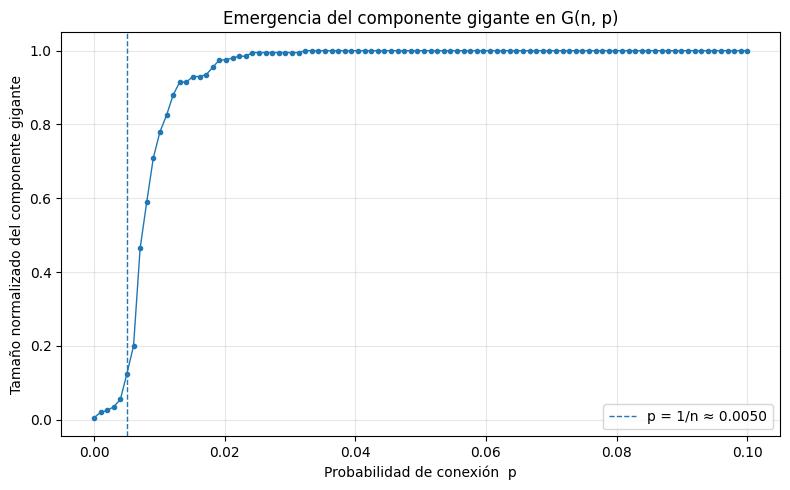

In [1]:
# Problema 1 — Transición de fase en grafos Erdős–Rényi (G(n, p))


import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 1) Parámetros de simulación
n = 200                                   # número de nodos
p_values = np.linspace(0.0, 0.1, 100)     # 100 probabilidades entre 0 y 0.1
seed = 42                                  # semilla para reproducibilidad (opcional)

# 2) Contenedor para tamaños normalizados del componente gigante
giant_norm = []

# 3) Simulación para cada p
for p in p_values:
    # Grafo Erdős–Rényi no dirigido G(n, p)
    G = nx.erdos_renyi_graph(n=n, p=p, seed=seed, directed=False)
    
    # Componentes conectados (conjunto de nodos por componente)
    components = list(nx.connected_components(G)) if G.number_of_nodes() > 0 else []
    
    # Tamaño del componente más grande
    largest_size = max((len(c) for c in components), default=0)
    
    # Tamaño normalizado
    giant_norm.append(largest_size / n)

giant_norm = np.array(giant_norm)

# 4) Umbral teórico aproximado de conectividad (emergencia del gigante)
p_threshold = 1.0 / n

# 5) Gráfica
plt.figure(figsize=(8, 5))
plt.plot(p_values, giant_norm, marker='o', ms=3, lw=1)
plt.axvline(p_threshold, linestyle='--', linewidth=1, label=f"p = 1/n ≈ {p_threshold:.4f}")

plt.title("Emergencia del componente gigante en G(n, p)")
plt.xlabel("Probabilidad de conexión  p")
plt.ylabel("Tamaño normalizado del componente gigante")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Análisis de la transición de fase en $G(n,p)$ ($n=200$)

### 1) ¿Transición gradual o abrupta? ¿En qué $p$ ocurre?
- El **tamaño normalizado del componente gigante** pasa de ≈0 a ≈1 en un **salto abrupto** (no gradual).
- El cambio se inicia cerca de $p \approx 0.004$ y se vuelve muy marcado entre $p \in [0.006,\,0.015]$.
- Para $p \gtrsim 0.02$ el componente gigante cubre prácticamente **toda** la red.

**Conclusión:** la transición observada es **abrupta**, con el quiebre principal alrededor de $p \approx 0.01$.



### 2) Comparación con el umbral teórico $p_c = 1/n$
- Con $n=200$, $p_c = 1/n \approx 0.0050$ (línea discontinua).
- En la simulación, la emergencia del gigante comienza **muy cerca** de ese valor y se consolida algo **por encima** (p. ej., $0.007$–$0.015$).

**Tamaño finito (explicación):**
- En grafos finitos y con una sola realización, el punto aparente puede **desplazarse** por **azar muestral**.
- Diferenciar:
  - **Umbral de componente gigante:** $np \approx 1 \Rightarrow p \approx 1/n$.
  - **Umbral de conectividad total:** $p_{\text{conn}} \approx \ln(n)/n$.  
    Para $n=200$: $\ln(200)/200 \approx 0.0265$.  
    La curva roza valores ≈1 cerca de ese rango, coherente con conectividad casi total.


### 3) Interpretación epidemiológica
- Si el **parámetro de transmisión** (análogo a $p$) **cruza el umbral crítico**, aparece un **componente gigante** de individuos conectados por rutas de contagio.
- En $G(n,p)$, el criterio medio se asocia a $np \approx 1$, equivalente a un número reproductivo esperado **$\ge 1$**.
- **Debajo del umbral:** **brotes locales** que se extinguen.  
  **Encima del umbral:** **brotes generalizados** o epidemias extensas.




## **Problema 2**

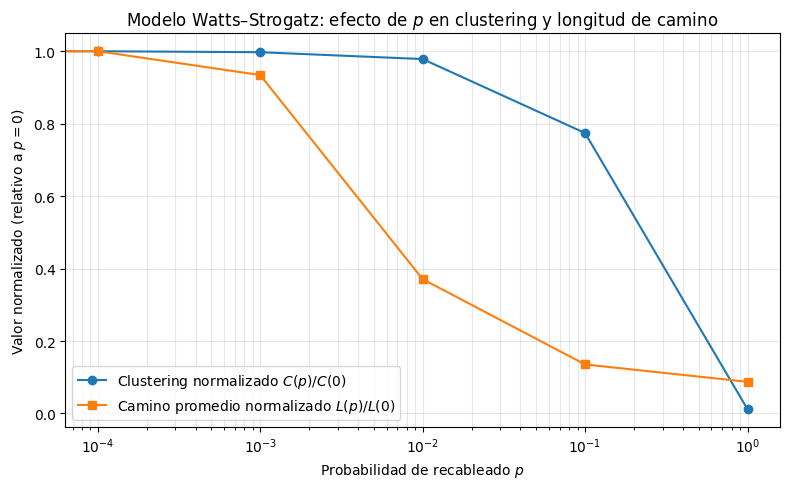

Base (p=0): C(0) = 0.6000, L(0) = 42.0842

Resultados:
p=0        C=0.6000  L=42.0842  C/C0=1.000  L/L0=1.000
p=0.0001   C=0.6000  L=42.0842  C/C0=1.000  L/L0=1.000
p=0.001    C=0.5984  L=39.3186  C/C0=0.997  L/L0=0.934
p=0.01     C=0.5870  L=15.6078  C/C0=0.978  L/L0=0.371
p=0.1      C=0.4645  L=5.6972  C/C0=0.774  L/L0=0.135
p=1        C=0.0071  L=3.6800  C/C0=0.012  L/L0=0.087


In [2]:
# Problema 2 — Pequeño mundo (Watts–Strogatz): clustering vs. longitud de camino


import networkx as nx
import matplotlib.pyplot as plt

# 1) Parámetros base
n = 500            # nodos
k = 6              # cada nodo conectado a k vecinos locales (k debe ser par)
p_list = [0, 1e-4, 1e-3, 1e-2, 1e-1, 1]   # escala "log" para captar efectos con p pequeño
seed = 42          # semilla para reproducibilidad (opcional)

# 2) Contenedores de resultados absolutos
clustering_vals = []
path_len_vals   = []

# 3) Función segura para longitud de camino promedio:
def avg_shortest_path_length_safe(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    # tomar la componente gigante
    largest_cc_nodes = max(nx.connected_components(G), key=len)
    G_lcc = G.subgraph(largest_cc_nodes).copy()
    return nx.average_shortest_path_length(G_lcc)

# 4) Bucle principal sobre p
for p in p_list:
    G = nx.watts_strogatz_graph(n=n, k=k, p=p, seed=seed)

    # Coeficiente de agrupamiento promedio
    C = nx.average_clustering(G)
    clustering_vals.append(C)

    # Longitud de camino promedio (en la LCC si hiciera falta)
    L = avg_shortest_path_length_safe(G)
    path_len_vals.append(L)

# 5) Normalización respecto a p = 0 (primer elemento)
C0 = clustering_vals[0]
L0 = path_len_vals[0]

clustering_norm = [c / C0 for c in clustering_vals]
path_len_norm   = [l / L0 for l in path_len_vals]

# 6) Gráfica: ambas curvas normalizadas vs p (eje X logarítmico)
plt.figure(figsize=(8, 5))
plt.plot(p_list, clustering_norm, marker='o', linewidth=1.5, label='Clustering normalizado $C(p)/C(0)$')
plt.plot(p_list, path_len_norm, marker='s', linewidth=1.5, label='Camino promedio normalizado $L(p)/L(0)$')

plt.xscale('log')
plt.xlabel('Probabilidad de recableado $p$')
plt.ylabel('Valor normalizado (relativo a $p=0$)')
plt.title('Modelo Watts–Strogatz: efecto de $p$ en clustering y longitud de camino')
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 7) Imprimir valores base y tablas rápidas
print(f"Base (p=0): C(0) = {C0:.4f}, L(0) = {L0:.4f}\n")
print("Resultados:")
for p, C, L, Cn, Ln in zip(p_list, clustering_vals, path_len_vals, clustering_norm, path_len_norm):
    print(f"p={p:<7}  C={C:.4f}  L={L:.4f}  C/C0={Cn:.3f}  L/L0={Ln:.3f}")


## Análisis — Modelo Watts–Strogatz: efecto de $p$ en $C(p)$ y $L(p)$

**Base ($p=0$):** $C(0)=0.6000$, $L(0)=42.0842$

### 1) Tendencias globales
- **Clustering** $C(p)$ decrece **lentamente** al inicio y **rápidamente** al acercarse a $p=1$.
  - Normalizado: $C/C_0$ pasa de $1.000$ ($p=0$) a $0.978$ ($p=0.01$) y cae a $0.012$ en $p=1$.
- **Longitud de camino** $L(p)$ cae **abruptamente** con $p$ pequeño y continúa reduciéndose después:
  - $L/L_0$ desciende a $0.934$ ($p=0.001$), a $0.371$ ($p=0.01$) y a $0.087$ en $p=1$.

### 2) Régimen de “mundo pequeño” (beneficio con poco desorden)
- Con **pocos atajos** ($p=0.01$):
  - **$C/C_0 \approx 0.978$** → el **agrupamiento local** se conserva casi intacto.
  - **$L/L_0 \approx 0.371$** → el **camino promedio** se reduce a **un 37%** del original.
- Con **algo más de atajos** ($p=0.1$):
  - $C/C_0 \approx 0.774$ (aún alto comparado con $p=1$).
  - $L/L_0 \approx 0.135$ (gran eficiencia en alcance global).

**Interpretación:** pequeños valores de $p$ ya introducen atajos que **colapsan distancias** sin destruir el **clustering**. Este es el sello del **mundo pequeño**.

### 3) Límite aleatorio ($p=1$)
- La red se aproxima a un grafo aleatorio: **$C$ casi nulo** ($0.0071$) y **$L$ mínimo** ($3.68$).
- Se pierde la estructura comunitaria (triángulos), aunque las distancias son cortas.

### 4) Conclusiones prácticas
- Para aplicaciones donde se buscan **rutas cortas** pero se desea mantener **cohesión local** (comunidades, redundancia), es suficiente un **$p$ pequeño**:
  - Ejemplo efectivo: $p\in[0.01,\,0.1]$ en este experimento.
- Si se prioriza la **mínima distancia global** sin importar comunidades, $p$ alto maximiza la reducción de $L$ a costa de **destruir $C$**.

### 5) Tabla de resultados (resumen)
- $p=0$: $C/C_0=1.000$, $L/L_0=1.000$  
- $p=10^{-4}$: $C/C_0=1.000$, $L/L_0=1.000$  
- $p=10^{-3}$: $C/C_0=0.997$, $L/L_0=0.934$  
- $p=10^{-2}$: $C/C_0=0.978$, $L/L_0=0.371$  
- $p=10^{-1}$: $C/C_0=0.774$, $L/L_0=0.135$  
- $p=1$: $C/C_0=0.012$, $L/L_0=0.087$
